# Processos Estocásticos: o algoritmo PageRank

Francisco Aparecido Rodrigues, francisco@icmc.usp.br.<br>
Universidade de São Paulo, São Carlos, Brasil.<br>
https://sites.icmc.usp.br/francisco <br>
Copyright: Creative Commons

<hr>

Nessa aula vamos aprender sobre o algoritmo PageRank proposto por Sergey Brin e Larry Page para ordenar páginas na web. Esse algoritmo é conhecido como o "coração" do Google, pois o processo de busca na web se baseia nesse algoritmo.

Inicialmente, vamos definir o grafo que represente as páginas da web.

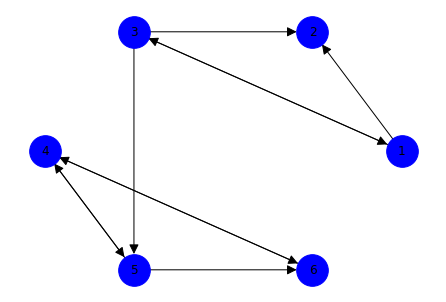

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

g = nx.DiGraph()
g.add_nodes_from([1,2,3,4,5,6])
g.add_edge(1,2)
g.add_edge(1,3)
g.add_edge(3,1)
g.add_edge(3,2)
g.add_edge(3,5)
g.add_edge(5,4)
g.add_edge(5,6)
g.add_edge(4,5)
g.add_edge(4,6)
g.add_edge(6,4)

options = {
    'node_color': 'blue',
    'node_size': 1000,
    'width': 1,
    'arrowstyle': '-|>',
    'arrowsize': 20,
}

npos=nx.circular_layout(g,scale=1)

nx.draw(g,pos = npos, with_labels=True, **options, arrows=True)
plt.show()

In [12]:
A = nx.to_numpy_matrix(g)
print(A)

[[0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 0. 0.]]


Vamos transformar a matriz em uma matriz de probabilidade de transição.

In [8]:
N = A.shape[0]
P = np.zeros((N,N))
for i in range(0,N):
    for j in range(0,N):
        if(np.sum(A[i,:]) > 0):
            P[i,j] = A[i,j]/np.sum(A[i,:])
        else:
            P[i,j] = 1/N
print(P)

[[0.         0.5        0.5        0.         0.         0.        ]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.33333333 0.33333333 0.         0.         0.33333333 0.        ]
 [0.         0.         0.         0.         0.5        0.5       ]
 [0.         0.         0.         0.5        0.         0.5       ]
 [0.         0.         0.         1.         0.         0.        ]]


A seguir, obtemos a matriz Google:

In [13]:
G = np.zeros((N,N))
alpha = 0.85
for i in range(0,N):
    for j in range(0,N):
        G[i,j] = alpha*P[i,j] + (1-alpha)/N
print(G)

[[0.025      0.45       0.45       0.025      0.025      0.025     ]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.30833333 0.30833333 0.025      0.025      0.30833333 0.025     ]
 [0.025      0.025      0.025      0.025      0.45       0.45      ]
 [0.025      0.025      0.025      0.45       0.025      0.45      ]
 [0.025      0.025      0.025      0.875      0.025      0.025     ]]


A distribuição estacinária é igual ao PageRank:

In [10]:
eigvals, eigvecs = np.linalg.eig(G.T)
eigvec1 = eigvecs[:,np.isclose(eigvals, 1)]
eigvec1 = eigvec1[:,0]

stationary = eigvec1 / eigvec1.sum()

stationary = stationary.real
for i in range(0,N):
    print(i+1, ':', stationary[i])

1 : 0.03721196507800219
2 : 0.05395734936310332
3 : 0.041505653356233116
4 : 0.375080815109834
5 : 0.20599833187742747
6 : 0.2862458852154


Podemos visualizar o grafo onde o tamanho dos vértices é proporcional ao PageRank.

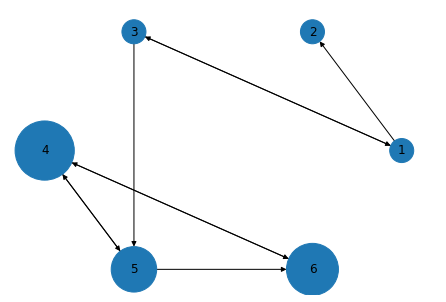

In [52]:
npos=nx.circular_layout(g,scale=1)

s = stationary*10000
nx.draw(g,pos = npos, with_labels=True, node_size = s, arrows=True)
plt.draw()
plt.show()

Vamos considerar outro exemplo, onde verificaremos que ser o mais conectado não é o mais importante.

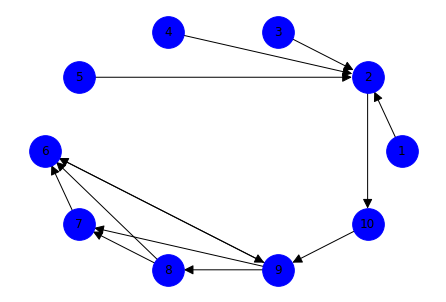

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

N = 10
g = nx.DiGraph()
g.add_nodes_from(np.arange(1,N+1))
g.add_edge(1,2)
g.add_edge(3,2)
g.add_edge(4,2)
g.add_edge(5,2)
g.add_edge(2,10)
g.add_edge(10,9)
g.add_edge(9,8)
g.add_edge(8,7)
g.add_edge(7,6)
g.add_edge(6,9)
g.add_edge(9,7)
g.add_edge(9,6)
g.add_edge(8,6)

options = {
    'node_color': 'blue',
    'node_size': 1000,
    'width': 1,
    'arrowstyle': '-|>',
    'arrowsize': 20,
}


npos=nx.circular_layout(g,scale=1)
#npos = nx.spring_layout(g)
nx.draw(g,pos = npos, with_labels=True, **options, arrows=True)
plt.draw()

Inicialmente, obtemos a matriz de probabilidade de transição, realizando o ajuste estocástico. 

In [25]:
A = nx.to_numpy_matrix(g)

N = A.shape[0]
P = np.zeros((N,N))
for i in range(0,N):
    for j in range(0,N):
        if(np.sum(A[i,:]) > 0):
            P[i,j] = A[i,j]/np.sum(A[i,:])
        else:
            P[i,j] = 1/N
print(P)

[[0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.5
  0.5        0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.33333333
  0.33333333 0.33333333 0.         0.        ]
 [0.         0.         0.  

A seguir, fazemos o ajuste ergótico e obtemos a matriz Google.

In [26]:
G = np.zeros((N,N))
alpha = 0.85
for i in range(0,N):
    for j in range(0,N):
        G[i,j] = alpha*P[i,j] + (1-alpha)/N
print(G)

[[0.015      0.865      0.015      0.015      0.015      0.015
  0.015      0.015      0.015      0.015     ]
 [0.015      0.015      0.015      0.015      0.015      0.015
  0.015      0.015      0.015      0.865     ]
 [0.015      0.865      0.015      0.015      0.015      0.015
  0.015      0.015      0.015      0.015     ]
 [0.015      0.865      0.015      0.015      0.015      0.015
  0.015      0.015      0.015      0.015     ]
 [0.015      0.865      0.015      0.015      0.015      0.015
  0.015      0.015      0.015      0.015     ]
 [0.015      0.015      0.015      0.015      0.015      0.015
  0.015      0.015      0.865      0.015     ]
 [0.015      0.015      0.015      0.015      0.015      0.865
  0.015      0.015      0.015      0.015     ]
 [0.015      0.015      0.015      0.015      0.015      0.44
  0.44       0.015      0.015      0.015     ]
 [0.015      0.015      0.015      0.015      0.015      0.29833333
  0.29833333 0.29833333 0.015      0.015     ]
 [0.01

Finalmente, calculamos o PageRank.

In [27]:
eigvals, eigvecs = np.linalg.eig(G.T)
eigvec1 = eigvecs[:,np.isclose(eigvals, 1)]
eigvec1 = eigvec1[:,0]

stationary = eigvec1 / eigvec1.sum()

stationary = stationary.real
for i in range(0,N):
    print(i+1, ':', stationary[i])

1 : 0.014999999999999994
2 : 0.06600000000000009
3 : 0.015000000000000008
4 : 0.015000000000000008
5 : 0.014999999999999989
6 : 0.2626353316271941
7 : 0.14196504412280775
8 : 0.09962459236688254
9 : 0.2986750318831152
10 : 0.07110000000000025


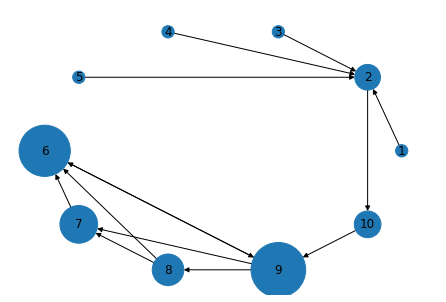

In [28]:
npos=nx.circular_layout(g,scale=1)

s = stationary*10000
nx.draw(g,pos = npos, with_labels=True, node_size = s, arrows=True)
plt.draw()

Notem que os vértices que recebem mais conexões nem sempre apresentam alto PageRank.